### Herman Ellingsrud, 299803

# Assignment 5: Dealing with large gradients

In this assignment i will explore how different schemes deal with signals with large gradients. The schemes that I will use is the FTBS scheme, the FTCS scheme, Lax-Wendroff and Crank-Nicolson. I am going to explore how these schemes deals with a strong and a weak gradient. I will also explore the total variation of the schemes. 

# Method

### Initial signals
I start by creating two initial signals: one with a sharp gradient and the other with a smooth gradient. The sharp signal features a box in the interval [35,50] for x, while the smooth signal features a Gaussian shape in the same interval. Both signals have values of zero for all x outside their respective intervals. The model domain is 100m wide, with a starting grid spacing of $∆x = 1 m$.

### Linear 1d equation

Part one uses the linear 1d equation for q:

\begin{equation}
    \frac{\partial q}{\partial t}=-a\frac{\partial q}{\partial x}  \:\:\:\:\:\:\:\:\:\:\:\:\:\:\:(1) 
\end{equation}

where $q(x,t)$ represents some parameter (e.g., temperature, salt, wind speed, current speed, etc), and a, represents the constant advection speed of $1ms^{−1}$. 

### FTBS scheme

\begin{equation}
   q_{i}^{n+1} = q_{i}^{n} - \frac{a \Delta t}{\Delta x} (q_{i}^{n} - q_{i-1}^{n})\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:(2)
\end{equation}

The FTBS scheme is a relativly stable scheme, compared to FCBC and FTFS, bot does however suffer from numerical dissipation (Van den Bosch, 2021).


### Lax-Wendroff

\begin{equation}
q_{i}^{n+1} = q_i^n - \frac{a \Delta t}{2 \Delta x} (q_{i+1}^n - q_{i-1}^n) + \frac{a^2 \Delta t^2}{2 \Delta x^2} (q_{i+1}^n - 2q_i^n + q_{i-1}^n) \:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:(3)
\end{equation}

The Lax-Wendroff scheme is a second order scheme. This scheme have some oscillations, but do not grow much beyond a certain point (Van den Bosch, 2021).

### 1d-diffusion equation

In part 2b, I will explore the 1d-diffusion equation and compare explicit versus implicit schemes. I will use the same initial conditions as I used in part 1. The 1d diffusion equation is expressed as:

\begin{equation}
    \frac{\partial q}{\partial t} = \nu \frac{\partial^2 q}{\partial x^2} \:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:(4)
\end{equation}

where $\nu$ = $0.1 kg m^{−1} s^{−1}$ is a diffusion coefficient.


### FTCS scheme

\begin{equation}
   q_{i}^{n+1} = q_{i}^{n} + \frac{\nu \Delta t}{\Delta x^{2}} (q_{i+1}^{n} - 2q_{i}^{n} + q_{i-1}^{n})
\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:(5)
\end{equation}

The FTCS scheme is conditionally stable when applied to the 1d-diffusion equation. After preformin a Von Neumann stability analysis we get that C must be less or equal to 1/2. 

### Crank-Nicolson

The implicit Crank-Nicolson scheme can be solved by using matrixes.

\begin{equation}
-r u_{k-1}^{n+1} + (1 + 2r) u_k^{n+1} - r u_{k+1}^{n+1} = r u_{k-1}^n - 2r u_k^n + r u_{k+1}^n\:\:\:\:\:\:\:\:(6)
\end{equation}

Where: \begin{equation}
C = \frac{\nu \Delta t}{\Delta x^2}
\end{equation}

\begin{equation}
r = \frac{C}{2}
\end{equation}

Solving for k = 1 up to k = L-1 gives a set of equations. The Crank-Nicholson scheme is unconditionally stable (Daae, 2024).


### CFL criteria

Both the FTBS and Lax-Wendroff schemes for the linear 1D equation follow the CFL criterion:

\begin{equation}
\text{CFL} = \frac{c \cdot \Delta t}{\Delta x} \leq 1
\end{equation}

For the 1D diffusion equation, the FTCS scheme follows the CFL criterion:

\begin{equation}
\text{CFL} = \frac{\nu \cdot \Delta t}{\Delta x^2} \leq \frac{1}{2}
\end{equation}

On the other hand, a von Neumann analysis of the Crank-Nicolson scheme shows that the scheme is stable for all values of \( C \), since:

\begin{equation}
\left| \frac{B_{n+1}}{B_n} \right| = \left| \frac{1 - 2C \sin^2 \left( \frac{\lambda \Delta x}{2} \right)}{1 + 2C \sin^2 \left( \frac{\lambda \Delta x}{2} \right)} \right| = 1
\end{equation}

### Boundary conditions

The schemes in the first par will use periodic boundary conditions. While the schemes in the second part of the assignment will use Neumann boundary conditions. A Neumann boundary condition specifies how the solution's gradient behaves at the boundary.


### Total Variation

Total Variation measures the amount of variation or changes in a function over a given domain. A scheme is TVD (Total Variation Diminishing) if the total variation do not increase with time, and is monotone (Daae, 2024). 

### Large language model

The Large language model ChatGPT was used to resolve errors that occurd in my code.


# Results

## Part 1

#### Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve
from scipy.sparse import spdiags
from scipy.sparse import diags

#### Define parameters

In [2]:
dt = 0.3                   # Timestep [s] Fulfills the CFL criterias
dx = 1                     # Distance between each x [m]
a = 1                      # advection speed m/s

n = int((5 * 60)/dt)       # Number of timesteps to run (5 min) 
X = 100                    # Spatial dimension size (100 m)
J = np.linspace(0, X, 100) # Spatial dimension 

#### Making initial signals

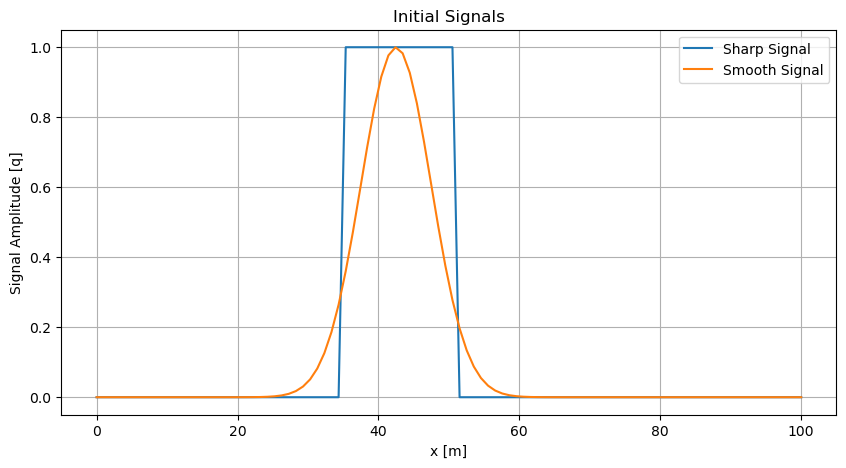

In [29]:
# Sharp Gradient
q_0_sharp = np.zeros(X) # make all the values zero
q_0_sharp[35:51] = 1 # gives the box the value 1

# Smooth Signal (Gaussian)
smooth_center = (35 + 50) / 2  # Center between indices 35 and 50
smooth_width = 5               # Adjust the width for smoothness
amplitude = 1 
q_0_smooth = amplitude * np.exp(-((J - smooth_center) ** 2) / (2 * smooth_width ** 2))

plt.figure(figsize=(10, 5))
plt.plot(J, q_0_sharp, label='Sharp Signal')
plt.plot(J, q_0_smooth, label='Smooth Signal')
plt.xlabel('x [m]')
plt.ylabel('Signal Amplitude [q]')
plt.title('Initial Signals')
plt.legend()
plt.grid(True)
plt.show()

### FTBS: 

\begin{equation}
   q_{i}^{n+1} = q_{i}^{n} - \frac{a \Delta t}{\Delta x} (q_{i}^{n} - q_{i-1}^{n})
\end{equation}


In [4]:
# FTBS
q_sharp = np.zeros((n,X)) #Makes arrays with all values zero.
q_smooth = np.zeros((n,X))

# inital signal
q_sharp[0,:] = q_0_sharp # gives the initial signal
q_smooth[0,:] = q_0_smooth

# Iteration in time
for n in range(n-1):
    # periodic boundary conditions by defining the first and last step using FTBS
    q_sharp[n,0] = q_sharp[n-1, 0] - a * dt / dx * (q_sharp[n-1,0] - q_sharp[n-1,-1])
    q_smooth[n,0] = q_smooth[n-1, 0] - a * dt / dx * (q_smooth[n-1,0] - q_smooth[n-1,-1])
    # Compute the next time step using FTBS scheme
    for i in range(1, X):
        q_sharp[n+1,i] = q_sharp[n,i] - a * dt / dx * (q_sharp[n,i] - q_sharp[n,i - 1])
        q_smooth[n+1,i] = q_smooth[n,i] - a * dt / dx * (q_smooth[n,i] - q_smooth[n,i - 1])

#### Plotting the solutions for FTBS

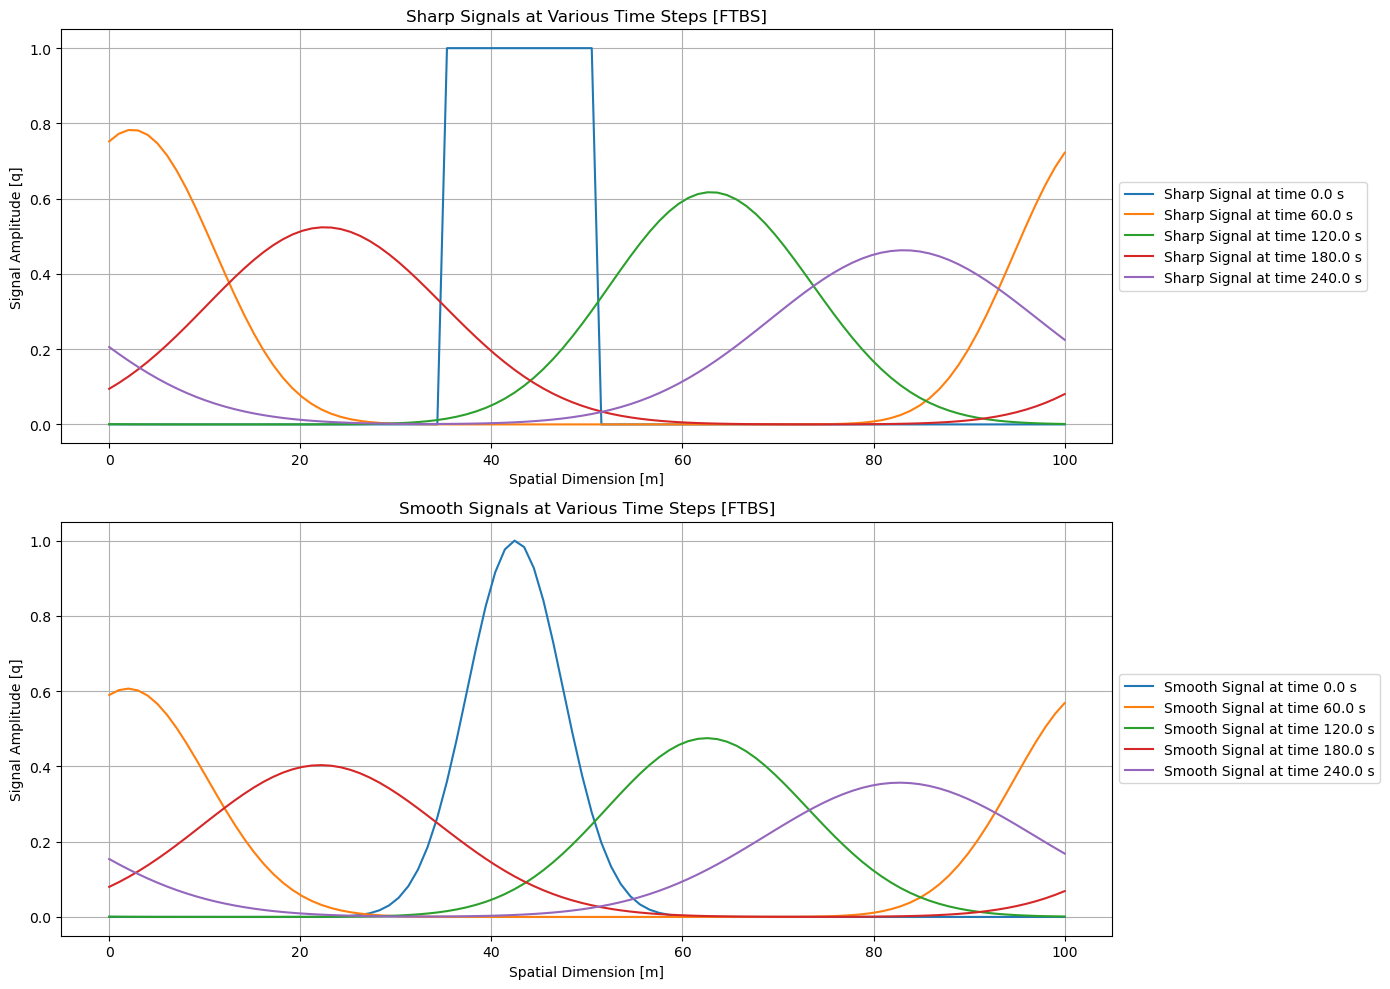

In [5]:
# Plot the signals for the selected time steps
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))  # Create a figure with 2 subplots

for t in range(0, n, 200):  # Plot every 200th time step
    ax1.plot(J, q_sharp[t, :], label=f'Sharp Signal at time {t*dt} s')
    ax2.plot(J, q_smooth[t, :], label=f'Smooth Signal at time {t*dt} s')

# Sharp signal subplot
ax1.set_xlabel('Spatial Dimension [m]')
ax1.set_ylabel('Signal Amplitude [q]')
ax1.set_title('Sharp Signals at Various Time Steps [FTBS]')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.grid(True)

# Smooth signal subplot
ax2.set_xlabel('Spatial Dimension [m]')
ax2.set_ylabel('Signal Amplitude [q]')
ax2.set_title('Smooth Signals at Various Time Steps [FTBS]')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.grid(True)

plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()

### Lax-Wendroff:

\begin{equation}
q_{i}^{n+1} = q_i^n - \frac{a \Delta t}{2 \Delta x} (q_{i+1}^n - q_{i-1}^n) + \frac{a^2 \Delta t^2}{2 \Delta x^2} (q_{i+1}^n - 2q_i^n + q_{i-1}^n)
\end{equation}

In [6]:
# Lax-Wendroff
q_sharp_LW = np.zeros((n,X))
q_smooth_LW = np.zeros((n,X))

# inital signal
q_sharp_LW[0,:] = q_0_sharp
q_smooth_LW[0,:] = q_0_smooth

# Iteration in time
for n in range(n-1):
    # Periodic boundary conditions by defining first and last step
    q_sharp_LW[n+1,-1] = q_sharp_LW[n,-1] - (a * dt) / (2*dx) * (q_sharp_LW[n,0] - q_sharp_LW[n,-2]) \
                           + (a**2 * dt**2) / (2 * dx**2) * (q_sharp_LW[n,0] - 2 * q_sharp_LW[n,-1] + q_sharp_LW[n,-2])
    q_smooth_LW[n+1,-1] = q_smooth_LW[n,-1] - (a * dt) / (2*dx) * (q_smooth_LW[n,0] - q_smooth_LW[n,-2]) \
                            + (a**2 * dt**2) / (2 * dx**2) * (q_smooth_LW[n,0] - 2 * q_smooth_LW[n,-1] + q_smooth_LW[n,-2])

    q_sharp_LW[n+1,0] = q_sharp_LW[n,0] - (a * dt) / (2*dx) * (q_sharp_LW[n,1] - q_sharp_LW[n,-1]) \
                           + (a**2 * dt**2) / (2 * dx**2) * (q_sharp_LW[n,1] - 2 * q_sharp_LW[n,0] + q_sharp_LW[n,-1])
    q_smooth_LW[n+1,0] = q_smooth_LW[n,0] - (a * dt) / (2*dx) * (q_smooth_LW[n,1] - q_smooth_LW[n,-1]) \
                           + (a**2 * dt**2) / (2 * dx**2) * (q_smooth_LW[n,1] - 2 * q_smooth_LW[n,0] + q_smooth_LW[n,-1])
    
    # Compute the next time step using Lax-Wendroff scheme
    for i in range(1, X - 1):
        q_sharp_LW[n+1,i] = q_sharp_LW[n,i] - (a * dt) / (2*dx) * (q_sharp_LW[n,i+1] - q_sharp_LW[n,i - 1]) \
                           + (a**2 * dt**2) / (2 * dx**2) * (q_sharp_LW[n,i+1] - 2 * q_sharp_LW[n,i] + q_sharp_LW[n,i-1])
        q_smooth_LW[n+1,i] = q_smooth_LW[n,i] - (a * dt) / (2*dx) * (q_smooth_LW[n,i+1] - q_smooth_LW[n,i - 1]) \
                             + (a**2 * dt**2) / (2 * dx**2) * (q_smooth_LW[n,i+1] - 2 * q_smooth_LW[n,i] + q_smooth_LW[n,i-1])


#### Plotting the solutions for Lax-Wendroff

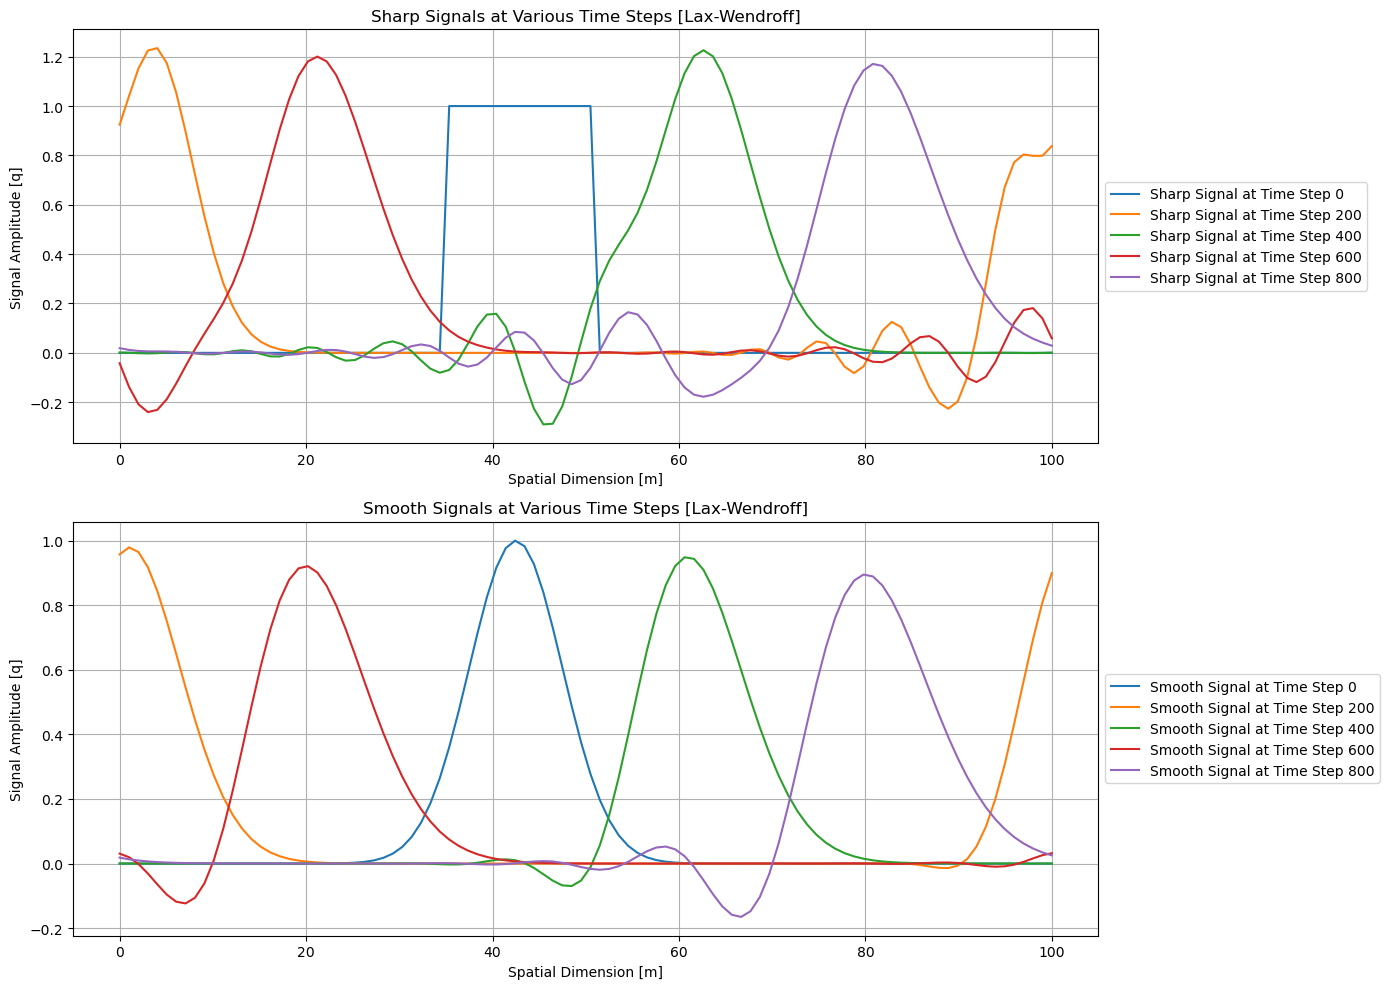

In [7]:
# Plot the signals for the selected time steps
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))  # Create a figure with 2 subplots

for t in range(0, n, 200):  # Plot every 200th time step
    ax1.plot(J, q_sharp_LW[t, :], label=f'Sharp Signal at Time Step {t}')
    ax2.plot(J, q_smooth_LW[t, :], label=f'Smooth Signal at Time Step {t}')

# Sharp signal subplot
ax1.set_xlabel('Spatial Dimension [m]')
ax1.set_ylabel('Signal Amplitude [q]')
ax1.set_title('Sharp Signals at Various Time Steps [Lax-Wendroff]')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.grid(True)

# Smooth signal subplot
ax2.set_xlabel('Spatial Dimension [m]')
ax2.set_ylabel('Signal Amplitude [q]')
ax2.set_title('Smooth Signals at Various Time Steps [Lax-Wendroff]')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.grid(True)

plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()

The plots clearly illustrate that the FTBS scheme exhibits more pronounced numerical dissipation compared to the Lax-Wendroff scheme. While the Lax-Wendroff scheme minimizes numerical dissipation, it introduces some oscillations in the solution and occasionally yields negative values. It seems like the Lax-Wendroff scheme is better suited for the signal with a smooth gradient.

#### Creating analytical solutions for sharp and smooth gradient

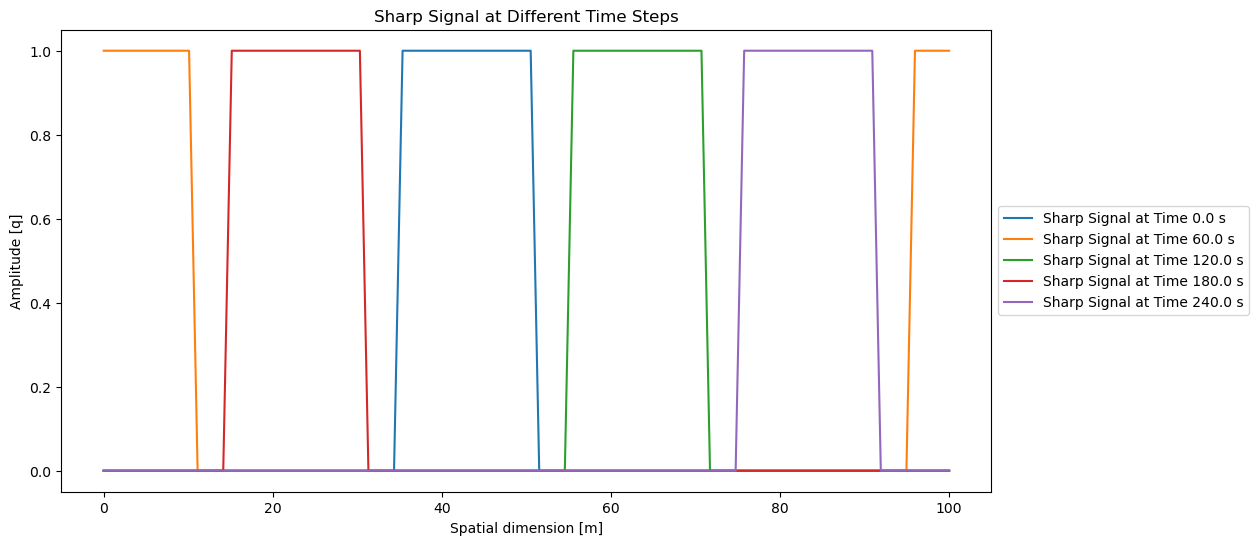

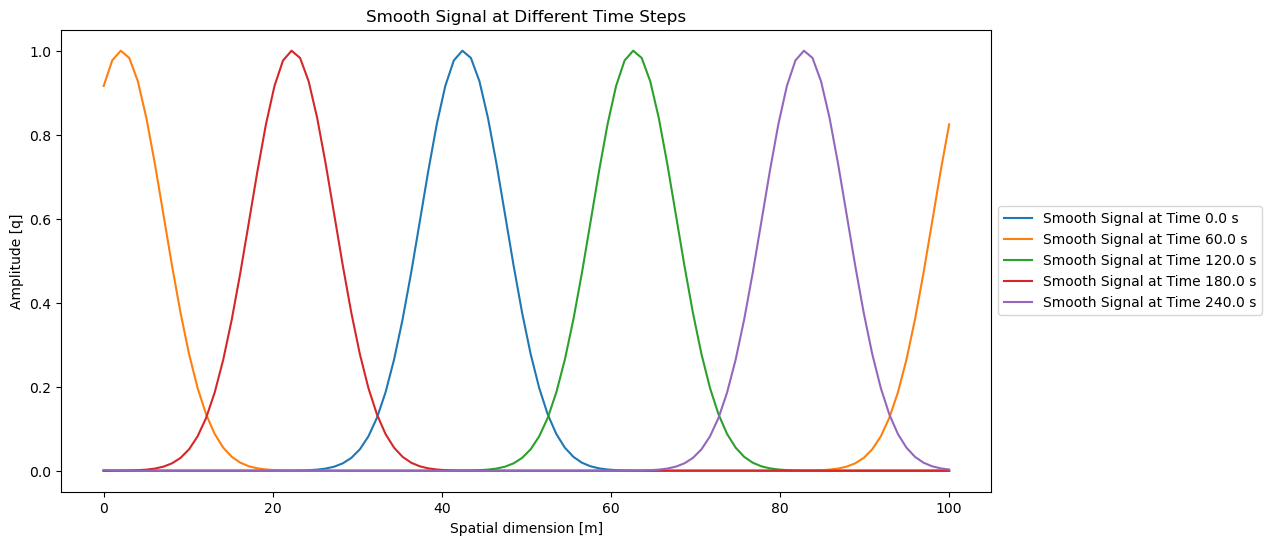

In [8]:
# Analytical solutions
# Apply advection to the signals
def advect(signal, speed, dt, dx):
    shift = int(speed * dt / dx)
    return np.roll(signal, shift)

# Apply advection to both sharp and smooth signals
q_a_sharp = np.zeros((n, X))
q_a_smooth = np.zeros((n, X))
for t in range(n):
    q_a_sharp[t, :] = advect(q_0_sharp, a, dt*t, dx)
    q_a_smooth[t, :] = advect(q_0_smooth, a, dt*t, dx)


plt.figure(figsize=(12, 6)) # makes figure
for t in range(0, n, 200): # Plotting every 200th time step
    plt.plot(J, q_a_sharp[t, :], label=f'Sharp Signal at Time {t*dt} s')

plt.title('Sharp Signal at Different Time Steps')
plt.xlabel('Spatial dimension [m]')
plt.ylabel('Amplitude [q]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Plotting every 200th time step
plt.figure(figsize=(12, 6))
for t in range(0, n, 200):
    plt.plot(J, q_a_smooth[t, :], label=f'Smooth Signal at Time {t * dt} s')

plt.title('Smooth Signal at Different Time Steps')
plt.xlabel('Spatial dimension [m]')
plt.ylabel('Amplitude [q]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### signals after 5 minutes

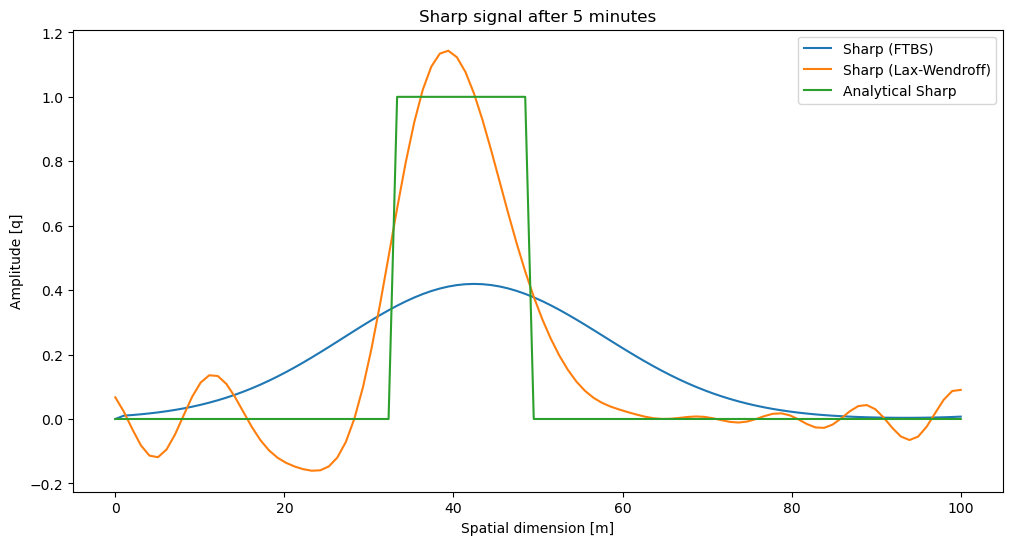

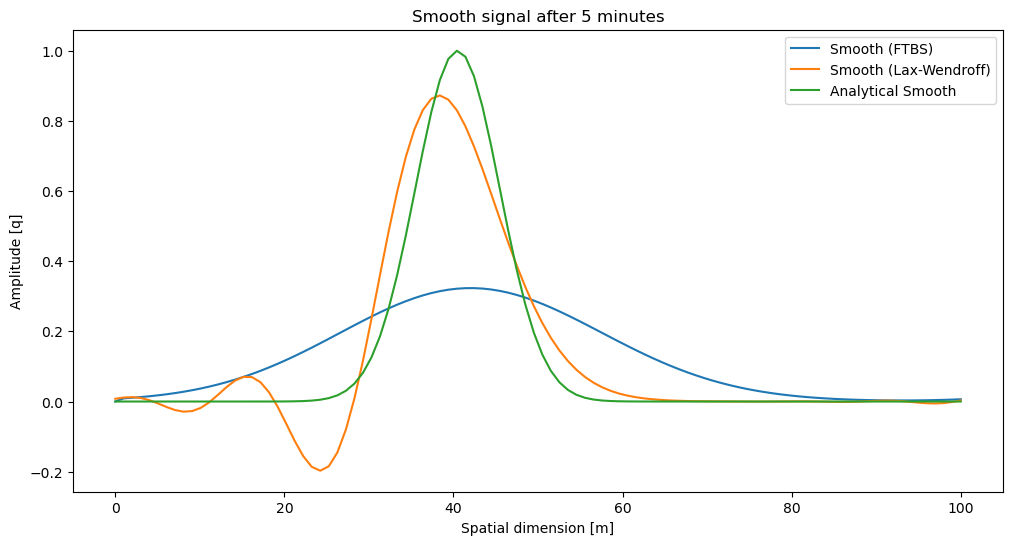

In [9]:
# Plotting after 5 minutes
plt.figure(figsize=(12, 6))

#Sharp
plt.plot(J, q_sharp[-1, :], label='Sharp (FTBS)') # plotting only the last timestep, 5 minutes
plt.plot(J, q_sharp_LW[-1, :], label='Sharp (Lax-Wendroff)')
plt.plot(J, q_a_sharp[-1, :], label=f'Analytical Sharp')
plt.title('Sharp signal after 5 minutes')
plt.xlabel('Spatial dimension [m]')
plt.ylabel('Amplitude [q]')
plt.legend()
plt.show()

#Smooth
plt.figure(figsize=(12, 6))
plt.plot(J, q_smooth[-1, :], label='Smooth (FTBS)')
plt.plot(J, q_smooth_LW[-1, :], label='Smooth (Lax-Wendroff)')
plt.plot(J, q_a_smooth[-1, :], label=f'Analytical Smooth')
plt.title('Smooth signal after 5 minutes')
plt.xlabel('Spatial dimension [m]')
plt.ylabel('Amplitude [q]')
plt.legend()
plt.show()

After 5 minutes, it's clear that the signals from the FTBS scheme have become much smaller, while those from the Lax-Wendroff scheme remain accurate.

### Evolution of q at the position x = 50 m for the two models

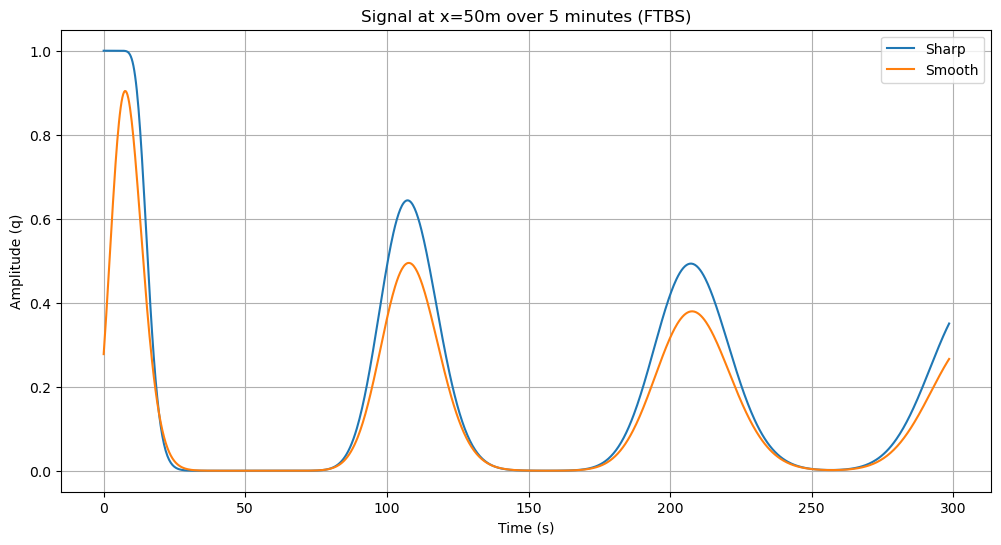

In [10]:
# FTBS
# Plotting the evolution of q at the position x = 50 m
plt.figure(figsize=(12, 6))
plt.plot(np.arange(n) * dt, q_sharp[:n, 50], label='Sharp') # [:n, 50] chooses x = 50
plt.plot(np.arange(n) * dt, q_smooth[:n, 50], label='Smooth')
plt.title('Signal at x=50m over 5 minutes (FTBS)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (q)')
plt.legend()
plt.grid(True)
plt.show()


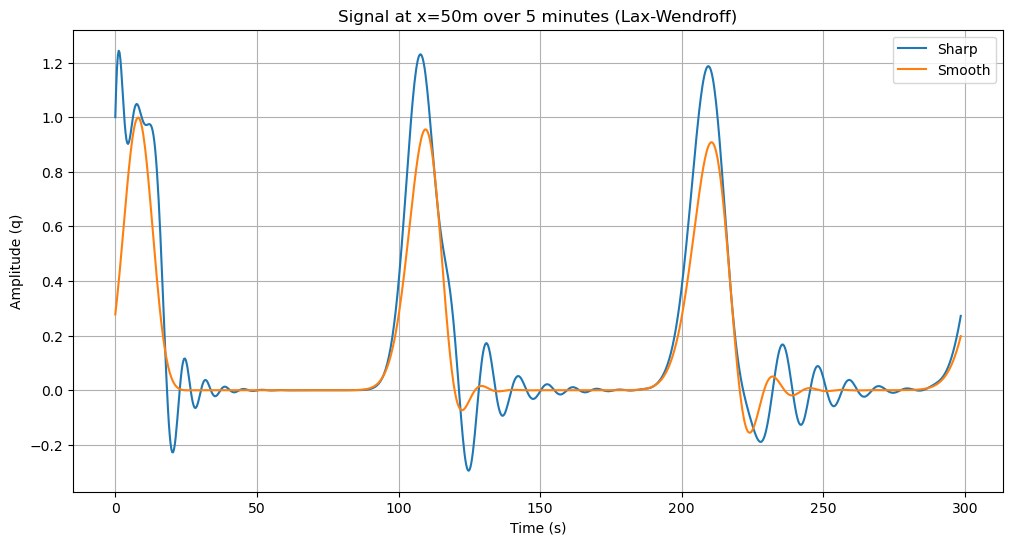

In [11]:
# Lax-Wendroff at x = 50 over 5 minutes
# Ensure both arrays have the same length
n_2 = min(len(np.arange(n) * dt), len(q_sharp_LW[:, 50])) # n had shape 1000 while q_sharp_LW and q_smooth_LW had shape 996 in time steps 

# Plotting the signals at x=50m over time
plt.figure(figsize=(12, 6))
plt.plot(np.arange(n_2) * dt, q_sharp_LW[:n_2, 50], label='Sharp')
plt.plot(np.arange(n_2) * dt, q_smooth_LW[:n_2, 50], label='Smooth')
plt.title('Signal at x=50m over 5 minutes (Lax-Wendroff)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (q)')
plt.legend()
plt.grid(True)
plt.show()

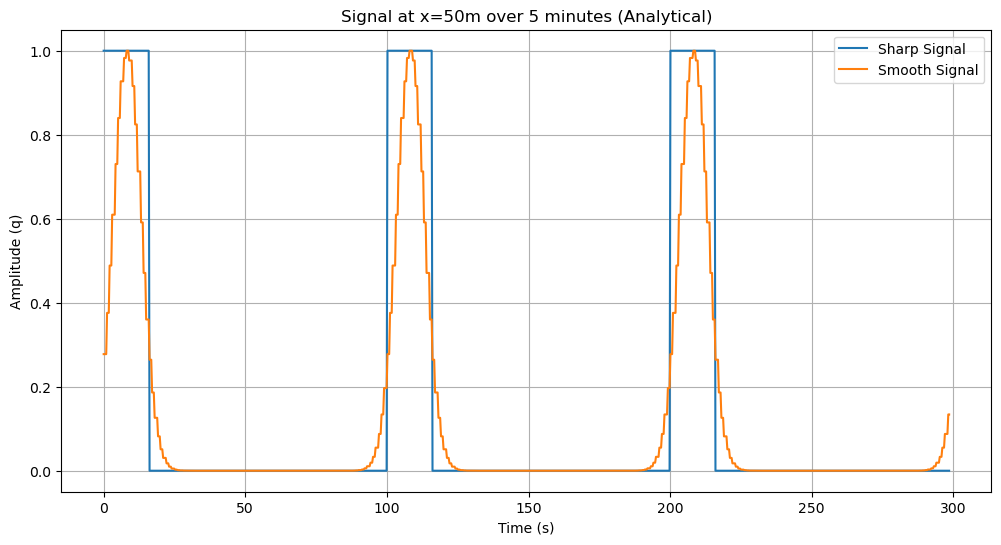

In [12]:
# Analytical solution
plt.figure(figsize=(12, 6))
plt.plot(np.arange(n) * dt, q_a_sharp[:n, 50], label='Sharp Signal')
plt.plot(np.arange(n) * dt, q_a_smooth[:n, 50], label='Smooth Signal')
plt.title('Signal at x=50m over 5 minutes (Analytical)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (q)')
plt.legend()
plt.grid(True)
plt.show()


From the three plots above, one can see that the values at the position x = 50 is decreasing for both schemes, but the Lax-Wendroff scheme does not decrease as much as the FTBS. 

### Total variation

In [13]:
# makes a function that calculates the total variation
def total_variation(signal):
    tv = 0
    for row in signal:
        tv += np.sum(np.abs(np.diff(row)))
    return tv

Total variation of sharp FTBS: 1227.8745273165457
Total variation of smooth FTBS: 966.7494128979778
Total variation of sharp Lax-Wndroff: 3669.495170244151
Total variation of smooth Lax-Wndroff: 2113.785584473675


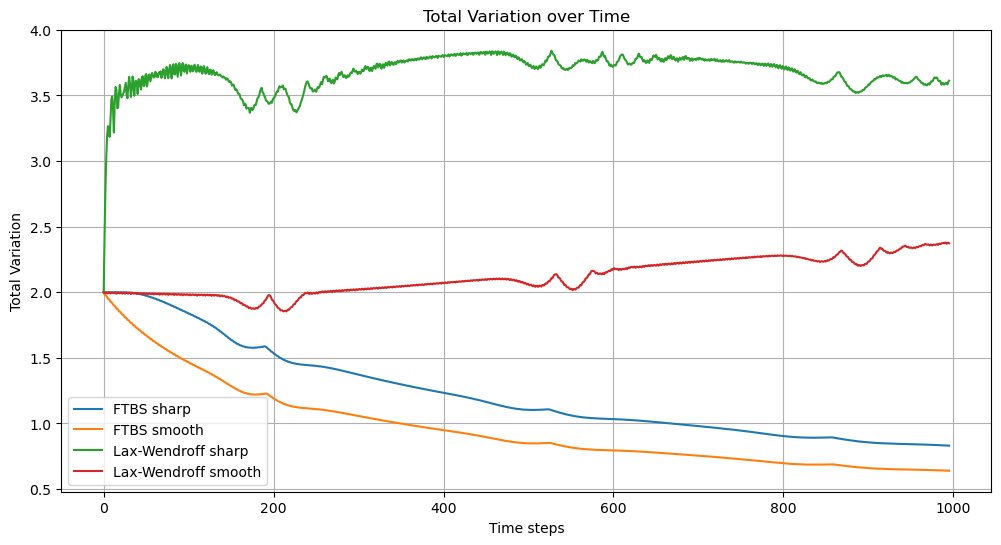

In [14]:
# uses the function i created over
TV_sharp_FTBS = total_variation(q_sharp)
TV_smooth_FTBS = total_variation(q_smooth)
TV_sharp_LW = total_variation(q_sharp_LW)
TV_smooth_LW = total_variation(q_smooth_LW)

#Prints the values
print("Total variation of sharp FTBS:", TV_sharp_FTBS)
print("Total variation of smooth FTBS:", TV_smooth_FTBS)
print("Total variation of sharp Lax-Wndroff:", TV_sharp_LW)
print("Total variation of smooth Lax-Wndroff:", TV_smooth_LW)

# Makes empty lists
total_variation_sharp_list = []
total_variation_smooth_list = []
total_variation_sharp_LW_list =[]
total_variation_smooth_LW_list = []

for t in range(n):
    # Calculate total variation for q_sharp and q_smooth
    total_variation_sharp = np.sum(np.abs(np.diff(q_sharp[t])))
    total_variation_smooth = np.sum(np.abs(np.diff(q_smooth[t])))


    # Append to the lists
    total_variation_sharp_list.append(total_variation_sharp)
    total_variation_smooth_list.append(total_variation_smooth)
    
for t in range(n_2):
    # Calculate total variation for q_sharp and q_smooth
    total_variation_sharp = np.sum(np.abs(np.diff(q_sharp_LW[t])))
    total_variation_smooth = np.sum(np.abs(np.diff(q_smooth_LW[t])))


    # Append to the lists
    total_variation_sharp_LW_list.append(total_variation_sharp)
    total_variation_smooth_LW_list.append(total_variation_smooth)

    
# Plot total variation with time
plt.figure(figsize=(12, 6))
plt.plot(range(n), total_variation_sharp_list, label='FTBS sharp')
plt.plot(range(n), total_variation_smooth_list, label='FTBS smooth')
plt.plot(range(n_2), total_variation_sharp_LW_list, label='Lax-Wendroff sharp')
plt.plot(range(n_2), total_variation_smooth_LW_list, label='Lax-Wendroff smooth')
plt.xlabel('Time steps')
plt.ylabel('Total Variation')
plt.title('Total Variation over Time')
plt.grid(True)
plt.legend()
plt.show()


The two FTBS signals are decreasing TV, but is not monotone, since there is a few spikes. This can be a fault in the boundary conditions or a effect of the periodic boundary condition. We can see that there is a spike around the 200 time step, and if wee look at the plot where I show how the schemes develop, we can see that the signals reach the boundaries around the 200 time step. We can see that the sharp Lax-Wendroff signal has the most total variation, and that ultimatly both Lax-Wendroff signals have more total variation than the FTBS signals. This might be because of the the oscillations in the Lax-Wendroff signals.

## Discussion
Compare and discuss the numerical solutions with the analytical solution. Use the figures and theory to support your arguments. Which model works the best, and what are possible caveats to the model?

As mentioned earlier, the Lax-Wendroff scheme is a better solution compared to the FTBS scheme. When comparing to the analytical solutions, the Lax-Wendroff scheme fits better. The FTBS scheme has to much numerical dissipation. The Lax-Wendroff schemes suffers from oscillations, hence a larger total variation. Lax-Wendroff is more accurate because it is a second-order scheme. 

# Part 2b


### FTCS

\begin{equation}
   q_{i}^{n+1} = q_{i}^{n} + \frac{\nu \Delta t}{\Delta x^{2}} (q_{i+1}^{n} - 2q_{i}^{n} + q_{i-1}^{n})
\end{equation}

#### Creates a FTCS function

In [15]:
# defines nu
nu = 0.1

# makes a function that applies the FTCS scheme to a signal.
def explicit_FTCS(signal, nu, n, X, dt, dx):
    for t in range(n - 1):
        # Compute the next time step using FTCS scheme
        for i in range(1, X - 1):
            signal[t + 1, i] = signal[t, i] + (nu * dt / dx**2) * (signal[t, i + 1] - 2 * signal[t, i] + signal[t, i - 1])
        
        # Apply Neumann boundary conditions at both boundaries
        signal[t + 1, 0] = signal[t, 0] + (nu * dt / dx**2) * (signal[t, 1] - signal[t, 0])  # Left boundary
        signal[t + 1, -1] = signal[t, -1] + (nu * dt / dx**2) * (signal[t, -2] - signal[t, -1])  # Right boundary
    
    return signal

#### Makes a FTCS signal with the funtcion above

In [16]:
q_0_test= np.zeros((n, X))


# Initial signal
q_0_test[0, :] = q_0_sharp


q_sharp_result = explicit_FTCS(q_0_test, nu, n,X,dt, dx)

#### Plot the FTCS solutions

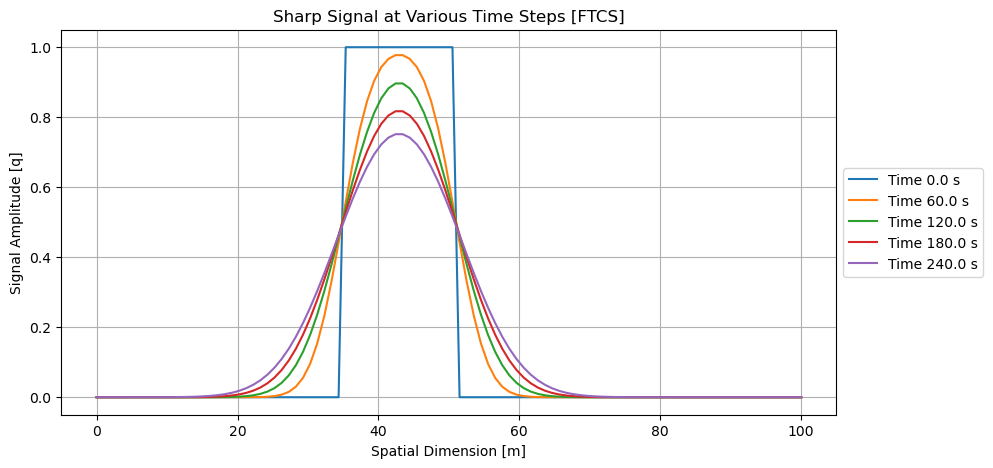

In [17]:
plt.figure(figsize=(10, 5))
for t in range(0, n, 200):  # Plot every 200th time step
    plt.plot(J, q_sharp_result[t, :], label=f'Time {t*dt} s')

plt.xlabel('Spatial Dimension [m]')
plt.ylabel('Signal Amplitude [q]')
plt.title('Sharp Signal at Various Time Steps [FTCS]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

#### Does the same for the smooth signal and plot it

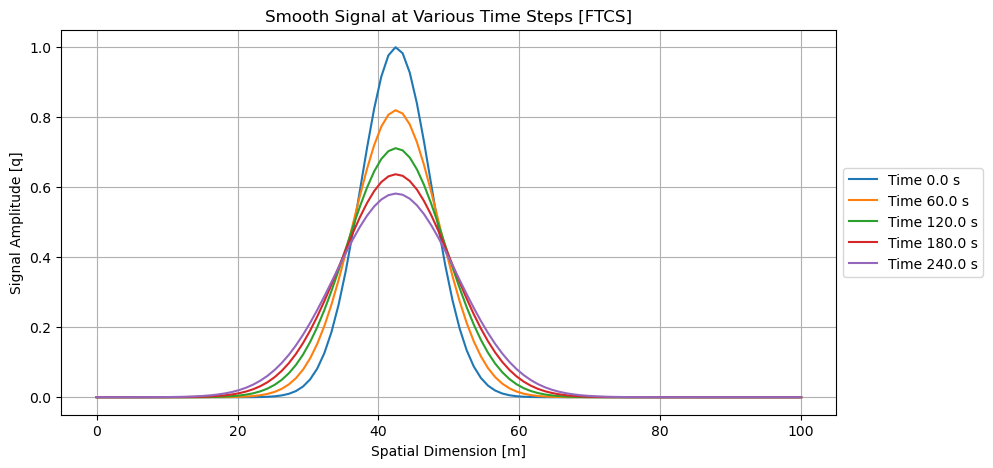

In [18]:
q_0_test_2= np.zeros((n, X))


# Initial signal
q_0_test_2[0, :] = q_0_smooth


q_result_smooth = explicit_FTCS(q_0_test_2, nu, n,X,dt, dx)

plt.figure(figsize=(10, 5))
for t in range(0, n, 200):  # Plot every 200th time step
    plt.plot(J, q_result_smooth[t, :], label=f'Time {t* dt} s')

plt.xlabel('Spatial Dimension [m]')
plt.ylabel('Signal Amplitude [q]')
plt.title('Smooth Signal at Various Time Steps [FTCS]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

### Crank-Nicolsen


In [19]:
# makes a function that applies the implicit crank-nicolsen scheme
def crank_nicolson_solver(dt, dx, nu, n, initial_condition):
    # Crank-Nicolson scheme parameters
    r = nu * dt / (2 * dx**2)
    nx = len(initial_condition)
    ones = np.ones(nx - 2)

    # Initial condition
    q0 = initial_condition.copy()
    q1 = q0.copy()

    # Coefficient matrices for implicit scheme
    A = diags([-r * ones, (1 + 2 * r) * ones, -r * ones], [-1, 0, 1], shape=(nx - 2, nx - 2)).toarray()
    B = diags([r * ones, (1 - 2 * r) * ones, r * ones], [-1, 0, 1], shape=(nx - 2, nx - 2)).toarray()

    A[0, 0] = 1 + r  # Neumann boundary condition at left boundary
    A[-1, -1] = 1 + r  # Neumann boundary condition at right boundary

    # Time-stepping loop
    solutions = [q0]
    for _ in range(n):
        # Implicit step
        V = B.dot(q0[1:-1])
        q1[1:-1] = np.linalg.solve(A, V)

        # Apply boundary conditions
        q1[0] = q1[1]  # Neumann boundary condition at left boundary
        q1[-1] = q1[-2]  # Neumann boundary condition at right boundary

        # Update q0 for the next iteration
        q0 = q1.copy()

        # Save the solution
        solutions.append(q0.copy())

    return solutions


#### Plots the Crank-Nicolson sharp signal

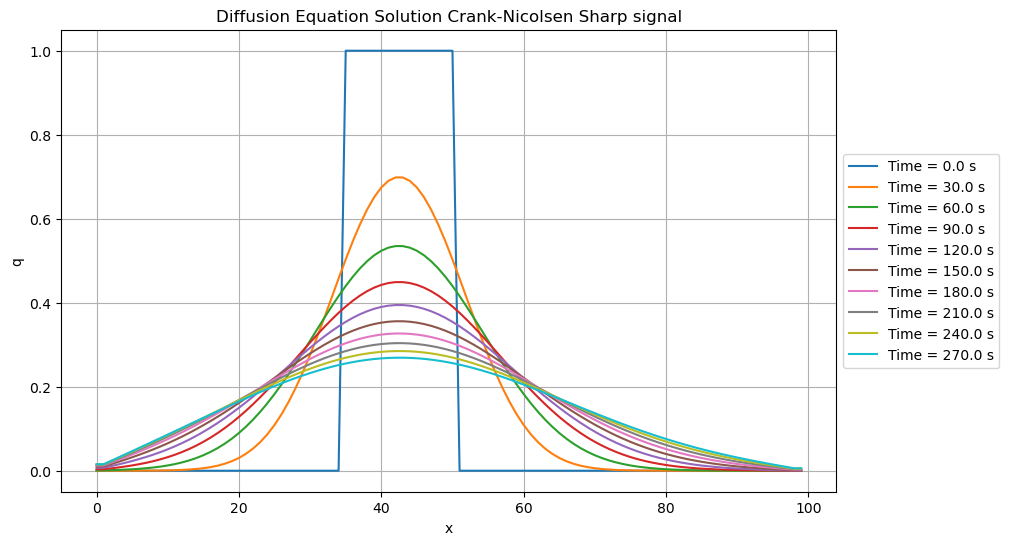

In [20]:
solutions = crank_nicolson_solver(dt, dx, a, n, q_0_sharp)

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Diffusion Equation Solution Crank-Nicolsen Sharp signal')
plt.xlabel('x')
plt.ylabel('q')
for t in range(0, n+1, 100):
    plt.plot(np.arange(0, len(solutions[0]) * dx, dx), solutions[t], label=f'Time = {t * dt} s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()


#### Plots the Crank-Nicolson smooth signal

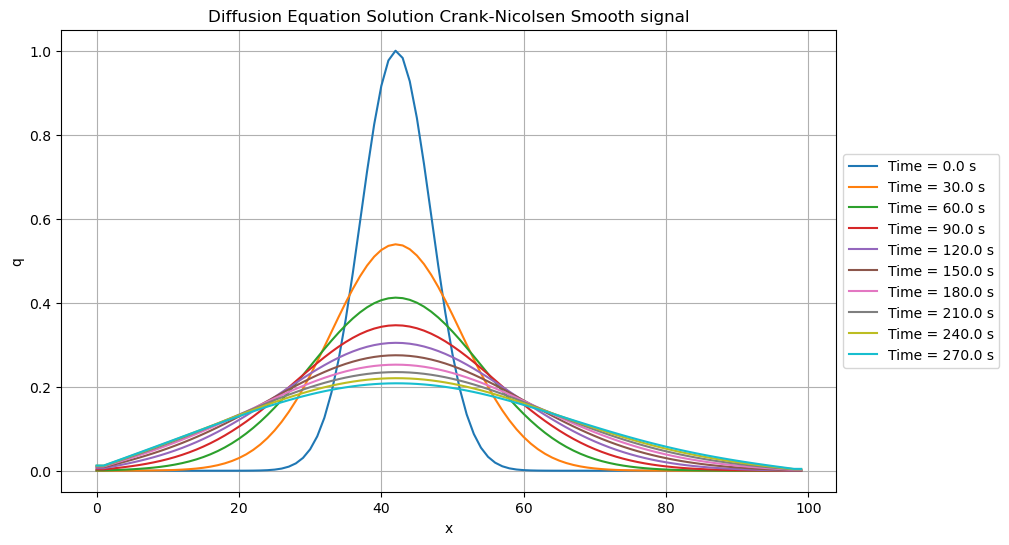

In [21]:
solutions_2 = crank_nicolson_solver(dt, dx, a, n, q_0_smooth)

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Diffusion Equation Solution Crank-Nicolsen Smooth signal')
plt.xlabel('x')
plt.ylabel('q')
for t in range(0, n+1, 100):
    plt.plot(np.arange(0, len(solutions_2[0]) * dx, dx), solutions_2[t], label=f'Time = {t * dt} s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

#### Makes a plot with  four subplots with the different schemes and signals

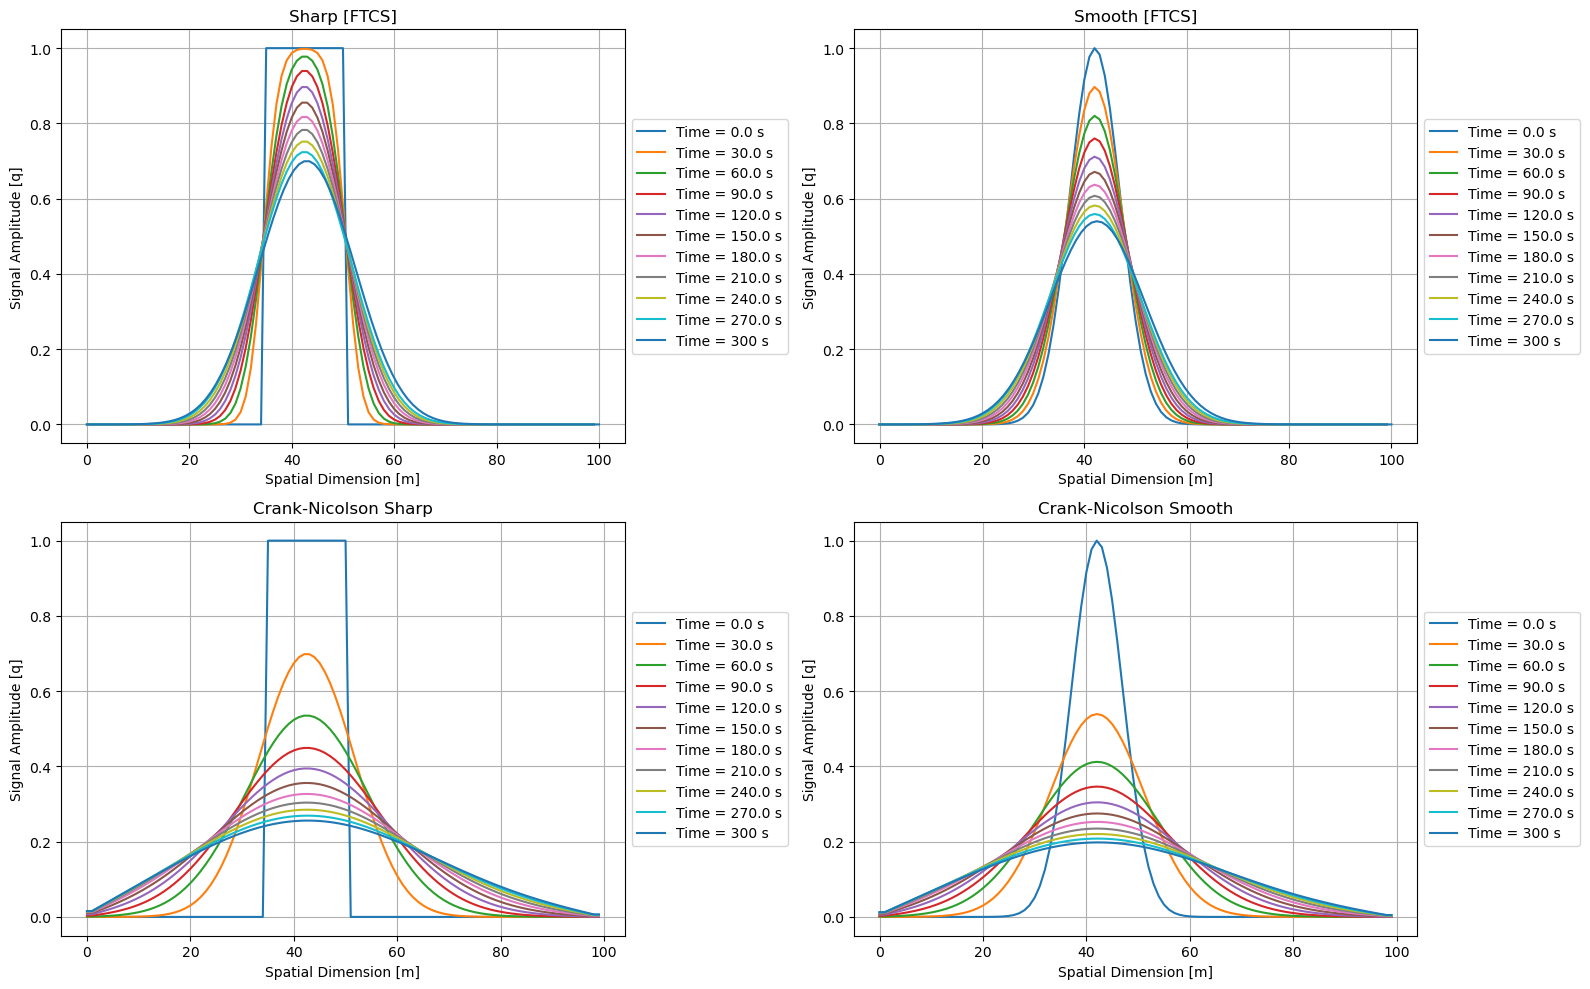

In [22]:
# Plotting Sharp Signal at Various Time Steps [FTCS]
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.title('Sharp [FTCS]')
plt.xlabel('Spatial Dimension [m]')
plt.ylabel('Signal Amplitude [q]')
for t in range(0, n+1, 100):
    plt.plot(np.arange(0, len(q_sharp_result[0]) * dx, dx), q_sharp_result[t], label=f'Time = {t * dt} s')
plt.plot(J, q_sharp_result[-1, :], label=f'Time = 300 s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

# Plotting Smooth Signal at Various Time Steps [FTCS]
plt.subplot(2, 2, 2)
plt.title('Smooth [FTCS]')
plt.xlabel('Spatial Dimension [m]')
plt.ylabel('Signal Amplitude [q]')
for t in range(0, n+1, 100):
    plt.plot(np.arange(0, len(q_result_smooth[0]) * dx, dx), q_result_smooth[t], label=f'Time = {t * dt} s')
plt.plot(J, q_result_smooth[-1, :], label=f'Time = 300 s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

# Plotting Diffusion Equation Solution Crank-Nicolson Sharp signal
plt.subplot(2, 2, 3)
plt.title('Crank-Nicolson Sharp')
plt.xlabel('Spatial Dimension [m]')
plt.ylabel('Signal Amplitude [q]')
for t in range(0, n+1, 100):
    plt.plot(np.arange(0, len(solutions[0]) * dx, dx), solutions[t], label=f'Time = {t * dt} s')
plt.plot(np.arange(0, len(solutions[0]) * dx, dx), solutions[-1], label=f'Time = 300 s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

# Plotting Diffusion Equation Solution Crank-Nicolson Smooth signal
plt.subplot(2, 2, 4)
plt.title('Crank-Nicolson Smooth')
plt.xlabel('Spatial Dimension [m]')
plt.ylabel('Signal Amplitude [q]')
for t in range(0, n+1, 100):
    plt.plot(np.arange(0, len(solutions_2[0]) * dx, dx), solutions_2[t], label=f'Time = {t * dt} s')
plt.plot(np.arange(0, len(solutions_2[0]) * dx, dx), solutions_2[-1], label=f'Time = 300 s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.tight_layout()
plt.show()

From the plot above one can see that the Crank-Nicolson schemes loses a lot of the initial signals compared to the FTCS.

## CFL criterion

I chose $\Delta t$ of 0.3 s, which is a relativly small change of time in this case. As mentioned in the metod part, the criteria for FTCS in the 1d-diffusion equation is:

\begin{equation}
    \Delta t \leq \frac{\Delta x^{2}}{2\nu}
\end{equation}

so when $\Delta x$ is 1 m, $\Delta t$ could be up to 5 seconds. 

The Crank-Nicolson scheme is unconditionally stable, and do therefor not require a low $\Delta t$. 

The reason i chose 0.3 s is that it would match nicely with a duration of 300 seconds. I will test with larger $\Delta t$ later in the assignment.

### signals after 5 minutes

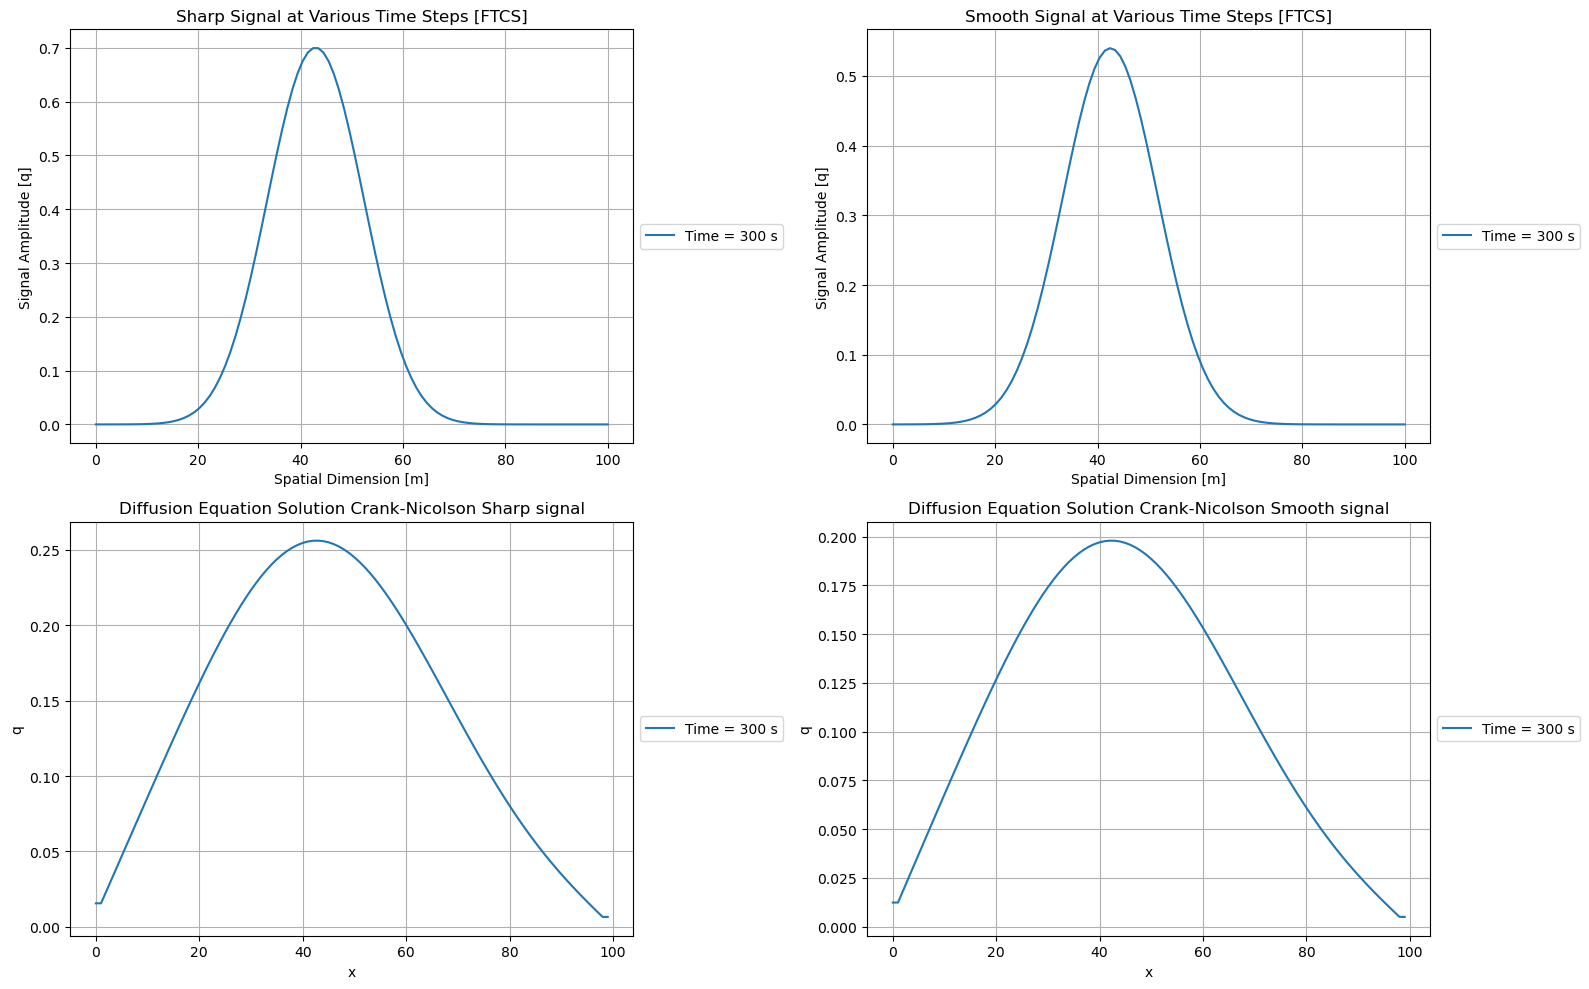

In [23]:
# at 5 min

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.title('Sharp Signal at Various Time Steps [FTCS]')
plt.xlabel('Spatial Dimension [m]')
plt.ylabel('Signal Amplitude [q]')
plt.plot(J, q_sharp_result[-1, :], label=f'Time = 300 s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

# Plotting Smooth Signal at Various Time Steps [FTCS]
plt.subplot(2, 2, 2)
plt.title('Smooth Signal at Various Time Steps [FTCS]')
plt.xlabel('Spatial Dimension [m]')
plt.ylabel('Signal Amplitude [q]')
plt.plot(J, q_result_smooth[-1, :], label=f'Time = 300 s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

# Plotting Diffusion Equation Solution Crank-Nicolson Sharp signal
plt.subplot(2, 2, 3)
plt.title('Diffusion Equation Solution Crank-Nicolson Sharp signal')
plt.xlabel('x')
plt.ylabel('q')
solutions = crank_nicolson_solver(dt, dx, a, n, q_0_sharp)
plt.plot(np.arange(0, len(solutions[0]) * dx, dx), solutions[-1], label=f'Time = 300 s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

# Plotting Diffusion Equation Solution Crank-Nicolson Smooth signal
plt.subplot(2, 2, 4)
plt.title('Diffusion Equation Solution Crank-Nicolson Smooth signal')
plt.xlabel('x')
plt.ylabel('q')
solutions_2 = crank_nicolson_solver(dt, dx, a, n, q_0_smooth)
plt.plot(np.arange(0, len(solutions_2[0]) * dx, dx), solutions_2[-1], label=f'Time = 300 s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.tight_layout()
plt.show()

#### Plotting them all in the same plot

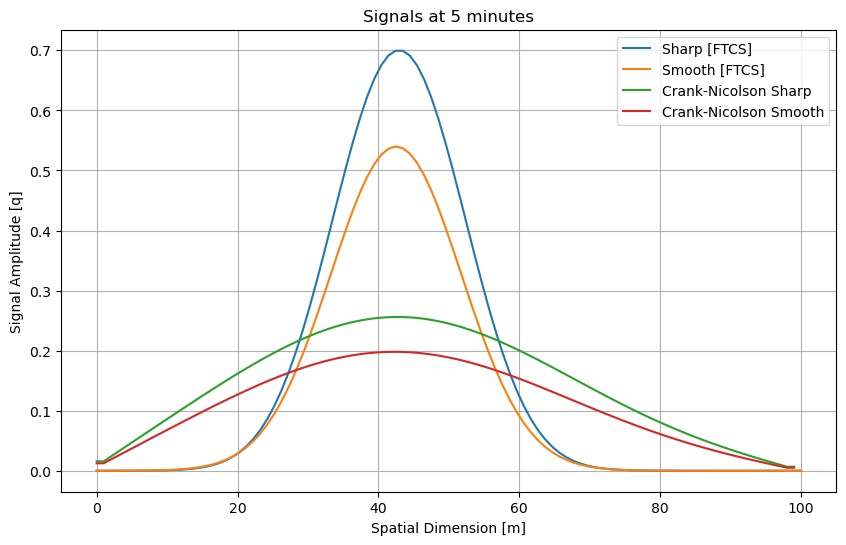

In [24]:
# Plotting all signals on the same plot
plt.figure(figsize=(10, 6))

# Sharp Signal at Time Step 300 [FTCS]
plt.plot(J, q_sharp_result[-1, :], label='Sharp [FTCS]')

# Smooth Signal at Time Step 300 [FTCS]
plt.plot(J, q_result_smooth[-1, :], label='Smooth [FTCS]')

# Diffusion Equation Solution Crank-Nicolson Sharp signal at Time Step 300
solutions = crank_nicolson_solver(dt, dx, a, n, q_0_sharp)
plt.plot(np.arange(0, len(solutions[0]) * dx, dx), solutions[-1], label='Crank-Nicolson Sharp')

# Diffusion Equation Solution Crank-Nicolson Smooth signal at Time Step 300
solutions_2 = crank_nicolson_solver(dt, dx, a, n, q_0_smooth)
plt.plot(np.arange(0, len(solutions_2[0]) * dx, dx), solutions_2[-1], label='Crank-Nicolson Smooth')

plt.xlabel('Spatial Dimension [m]')
plt.ylabel('Signal Amplitude [q]')
plt.title('Signals at 5 minutes')
plt.legend()
plt.grid(True)
plt.show()

After 5 minutes, both Crank-Nicolson signals have decreased significantly in magnitude, while the signals obtained using the FTCS method remain relatively accurate.

## evolution of q at the position x = 50 m for both models.

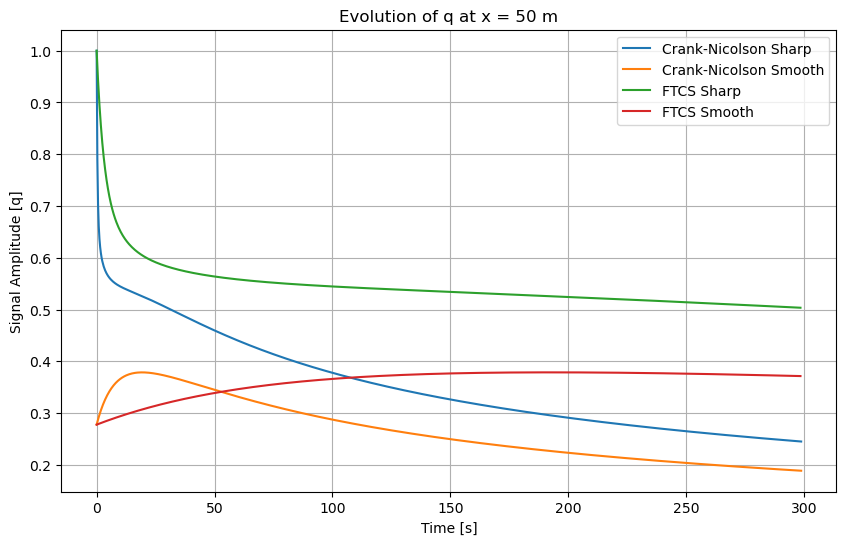

In [25]:
# Convert solutions to arrays
solutions = np.array(solutions)
solutions_2 = np.array(solutions_2)

# Extract q at position x = 50 m for both models
q_evolution_sharp_CN = solutions[:, int(50 / dx)]
q_evolution_smooth_CN = solutions_2[:, int(50 / dx)]
q_sharp_evolution_FTCS = q_sharp_result[:,int(50 / dx)]
q_smooth_evolution_FTCS = q_result_smooth[:,int(50 / dx)]

# Plot the evolution of q at x = 50 m for both models
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, (n + 1) * dt, dt), q_evolution_sharp_CN, label='Crank-Nicolson Sharp')
plt.plot(np.arange(0, (n + 1) * dt, dt), q_evolution_smooth_CN, label='Crank-Nicolson Smooth')
plt.plot(np.arange(n) * dt, q_sharp_evolution_FTCS, label='FTCS Sharp')
plt.plot(np.arange(n) * dt, q_smooth_evolution_FTCS, label='FTCS Smooth')
plt.xlabel('Time [s]')
plt.ylabel('Signal Amplitude [q]')
plt.title('Evolution of q at x = 50 m')
plt.legend()
plt.grid(True)
plt.show()




At x = 50 the FTCS sharp signals conservs most of the initial signal, while the sharp Crank-Nicolson loses a lot. From the former plots, one can see that the Crank-Nicolson schemes spreads more out and gets a smaller amplitude.

## Total Variation

Total variation of sharp FTCS: 1713.1375680069407
Total variation of smooth FTCS: 1397.3261332174404
Total variation of sharp Crank-Nicolson: 835.5552982352687
Total variation of smooth Crank-Nicolson: 652.4528828474974


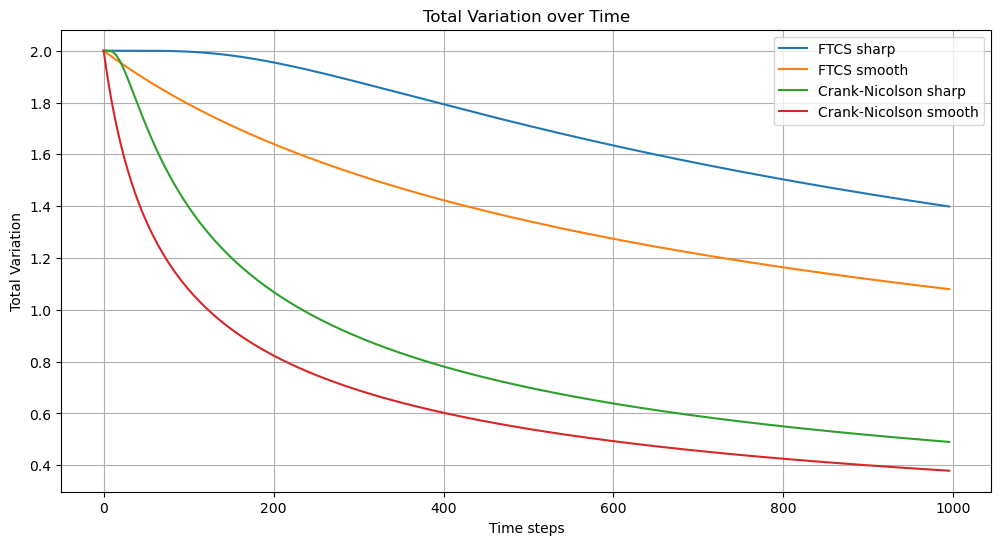

In [26]:
# use the function i created earlier.
TV_sharp_FTCS = total_variation(q_sharp_result)
TV_smooth_FTCS = total_variation(q_result_smooth)
TV_sharp_CN = total_variation(solutions)
TV_smooth_CN = total_variation(solutions_2)

print("Total variation of sharp FTCS:", TV_sharp_FTCS)
print("Total variation of smooth FTCS:", TV_smooth_FTCS)
print("Total variation of sharp Crank-Nicolson:", TV_sharp_CN)
print("Total variation of smooth Crank-Nicolson:", TV_smooth_CN)

TV_sharp_FTCS_list = []
TV_smooth_FTCS_list = []
TV_sharp_CN_list =[]
TV_smooth_CN_list = []

for t in range(n):
    # Calculate total variation for q_sharp and q_smooth
    total_variation_sharp_2 = np.sum(np.abs(np.diff(q_sharp_result[t])))
    total_variation_smooth_2 = np.sum(np.abs(np.diff(q_result_smooth[t])))


    # Append to the lists
    TV_sharp_FTCS_list.append(total_variation_sharp_2)
    TV_smooth_FTCS_list.append(total_variation_smooth_2)
    
for t in range(n):
    # Calculate total variation for q_sharp and q_smooth
    total_variation_sharp_3 = np.sum(np.abs(np.diff(solutions[t])))
    total_variation_smooth_3 = np.sum(np.abs(np.diff(solutions_2[t])))


    # Append to the lists
    TV_sharp_CN_list.append(total_variation_sharp_3)
    TV_smooth_CN_list.append(total_variation_smooth_3)

    
# Plot total variation with time
plt.figure(figsize=(12, 6))
plt.plot(range(n), TV_sharp_FTCS_list, label='FTCS sharp')
plt.plot(range(n), TV_smooth_FTCS_list, label='FTCS smooth')
plt.plot(range(n_2), TV_sharp_CN_list, label='Crank-Nicolson sharp')
plt.plot(range(n_2), TV_smooth_CN_list, label='Crank-Nicolson smooth')
plt.xlabel('Time steps')
plt.ylabel('Total Variation')
plt.title('Total Variation over Time')
plt.grid(True)
plt.legend()
plt.show()


They are all TV, becasue they all are decreasing and are monotone. 

## Different $\Delta t$

FTCS stability for 1d-diffusion equation is given by:

\begin{equation}
    \Delta t \leq \frac{\Delta x^{2}}{2\nu}
\end{equation}

Crank Nicholson does not require a low CFL number.



#### Test with dt = 5 s

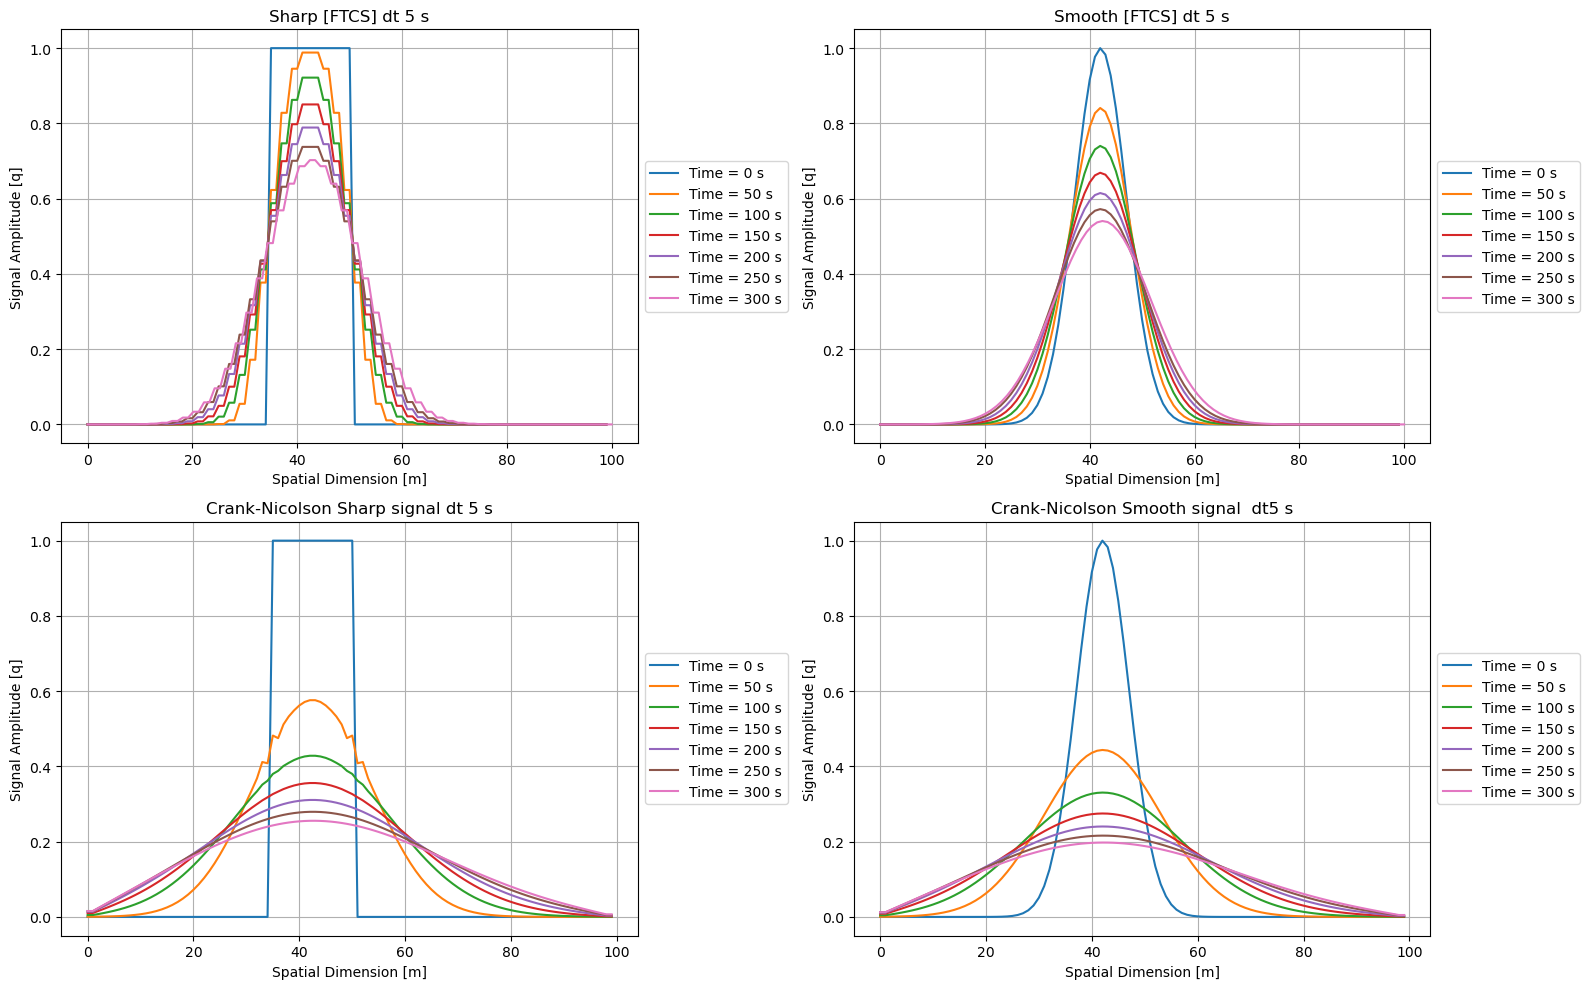

In [27]:
# critical dt for FTCS
dt_4 = 5
n_4 = int((5*60)/dt_4)

cn_4_sharp = crank_nicolson_solver(dt_4, dx, a, n_4, q_0_sharp)
cn_4_smooth = crank_nicolson_solver(dt_4, dx, a, n_4, q_0_smooth)

sharp_4 = np.zeros((n_4, X))
sharp_4[0, :] = q_0_sharp
sharp_4 = explicit_FTCS(sharp_4, nu, n_4, X, dt_4, dx)
smooth_4 = np.zeros((n_4, X))
smooth_4[0, :] = q_0_smooth
smooth_4 = explicit_FTCS(smooth_4, nu, n_4, X, dt_4, dx)

# Plotting Sharp Signal at Various Time Steps [FTCS]
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.title(f'Sharp [FTCS] dt {dt_4} s')
plt.xlabel('Spatial Dimension [m]')
plt.ylabel('Signal Amplitude [q]')
for t in range(0, n_4, 10):
    plt.plot(np.arange(0, len(sharp_4[0]) * dx, dx), sharp_4[t], label=f'Time = {t * dt_4} s')
plt.plot(J, sharp_4[-1, :], label=f'Time = 300 s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

# Plotting Smooth Signal at Various Time Steps [FTCS]
plt.subplot(2, 2, 2)
plt.title(f'Smooth [FTCS] dt {dt_4} s')
plt.xlabel('Spatial Dimension [m]')
plt.ylabel('Signal Amplitude [q]')
for t in range(0, n_4, 10):
    plt.plot(np.arange(0, len(smooth_4[0]) * dx, dx), smooth_4[t], label=f'Time = {t * dt_4} s')
plt.plot(J, smooth_4[-1, :], label=f'Time = 300 s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

# Plotting Diffusion Equation Solution Crank-Nicolson Sharp signal
plt.subplot(2, 2, 3)
plt.title(f'Crank-Nicolson Sharp signal dt {dt_4} s')
plt.xlabel('Spatial Dimension [m]')
plt.ylabel('Signal Amplitude [q]')
for t in range(0, n_4, 10):
    plt.plot(np.arange(0, len(cn_4_sharp[0]) * dx, dx), cn_4_sharp[t], label=f'Time = {t * dt_4} s')
plt.plot(np.arange(0, len(cn_4_sharp[0]) * dx, dx), cn_4_sharp[-1], label=f'Time = 300 s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

# Plotting Diffusion Equation Solution Crank-Nicolson Smooth signal
plt.subplot(2, 2, 4)
plt.title(f'Crank-Nicolson Smooth signal  dt{dt_4} s')
plt.xlabel('Spatial Dimension [m]')
plt.ylabel('Signal Amplitude [q]')
for t in range(0, n_4, 10):
    plt.plot(np.arange(0, len(cn_4_smooth[0]) * dx, dx), cn_4_smooth[t], label=f'Time = {t * dt_4} s')
plt.plot(np.arange(0, len(cn_4_smooth[0]) * dx, dx), cn_4_smooth[-1], label=f'Time = 300 s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.tight_layout()
plt.show()


With a critical $\Delta t$ value of 5 seconds, we can see that the sharp FTCS signal starts to change. The signals become more stuttered. One can also see a small change in the sharp Crank-Nicolson signal at a time of 50 seconds, which is a bit strange since this scheme is unconditionally stable. It is also a bit strange that the smooth FTCS is relativly not affected by the larger $\Delta t$.

#### test with dt = 6 seconds

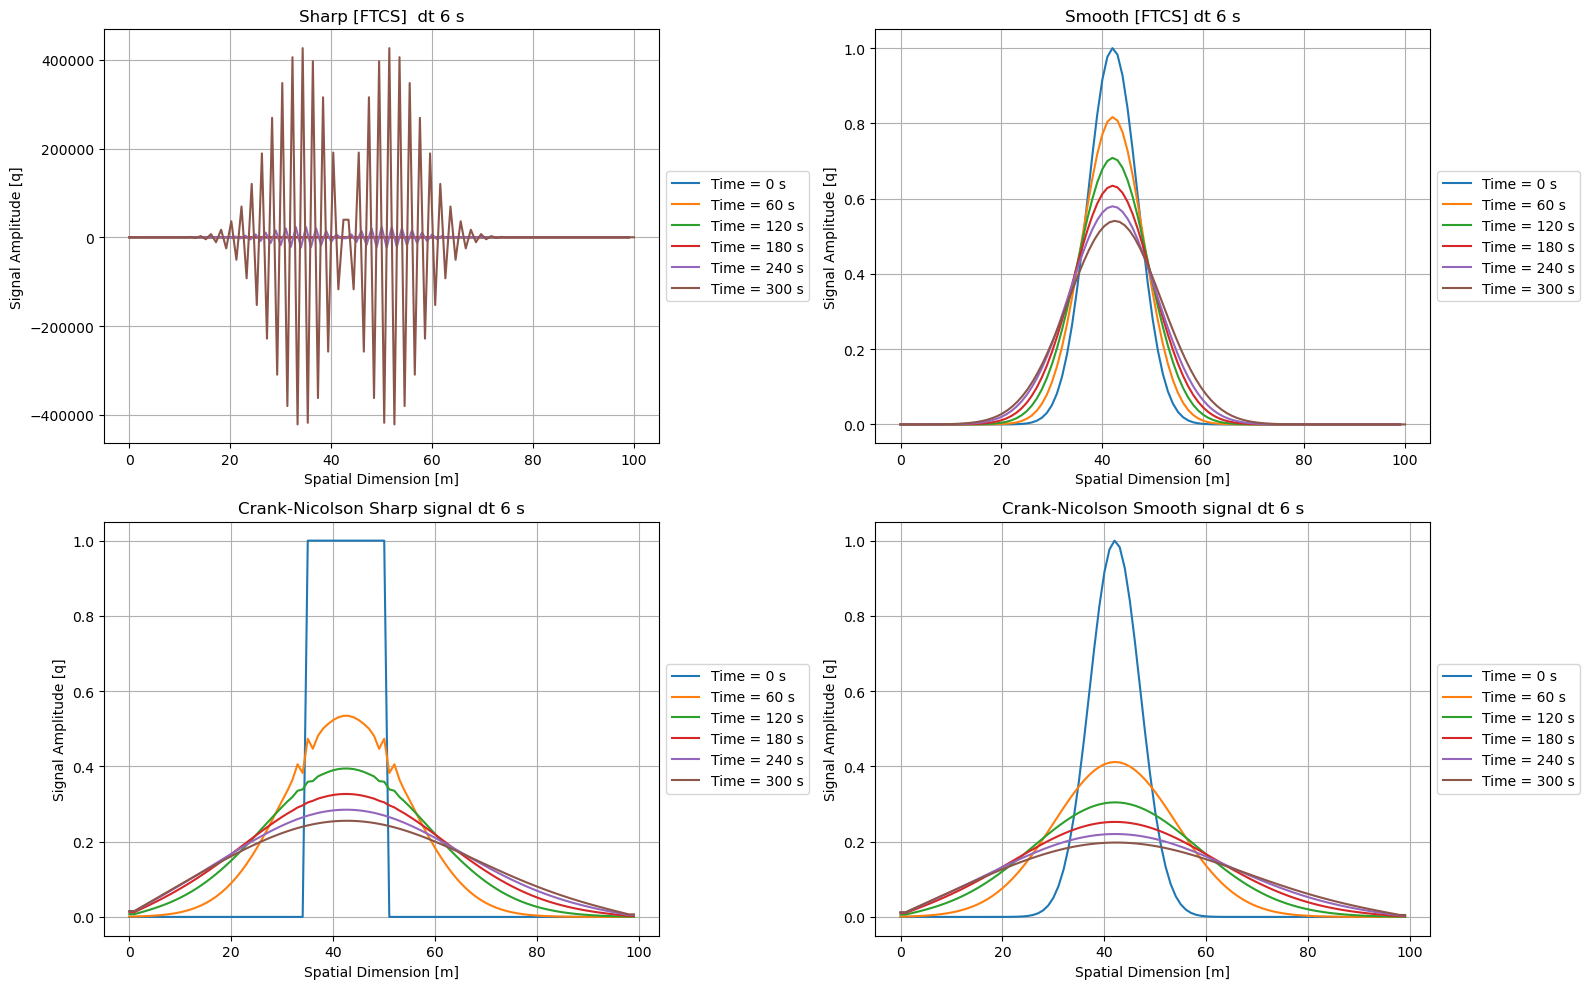

In [28]:
# different dt
dt_5 = 6
n_5 = int((5*60)/dt_5)

cn_5_sharp = crank_nicolson_solver(dt_5, dx, a, n_5, q_0_sharp)
cn_5_smooth = crank_nicolson_solver(dt_5, dx, a, n_5, q_0_smooth)

sharp_5 = np.zeros((n_5, X))
sharp_5[0, :] = q_0_sharp
sharp_5 = explicit_FTCS(sharp_5, nu, n_5, X, dt_5, dx)
smooth_5 = np.zeros((n_5, X))
smooth_5[0, :] = q_0_smooth
smooth_5 = explicit_FTCS(smooth_5, nu, n_5, X, dt_5, dx)

# Plotting Sharp Signal at Various Time Steps [FTCS]
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.title(f'Sharp [FTCS]  dt {dt_5} s')
plt.xlabel('Spatial Dimension [m]')
plt.ylabel('Signal Amplitude [q]')
for t in range(0, n_5, 10):
    plt.plot(np.arange(0, len(sharp_5[0]) * dx, dx), sharp_5[t], label=f'Time = {t * dt_5} s')
plt.plot(J, sharp_5[-1, :], label=f'Time = 300 s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

# Plotting Smooth Signal at Various Time Steps [FTCS]
plt.subplot(2, 2, 2)
plt.title(f'Smooth [FTCS] dt {dt_5} s')
plt.xlabel('Spatial Dimension [m]')
plt.ylabel('Signal Amplitude [q]')
for t in range(0, n_5, 10):
    plt.plot(np.arange(0, len(smooth_5[0]) * dx, dx), smooth_5[t], label=f'Time = {t * dt_5} s')
plt.plot(J, smooth_5[-1, :], label=f'Time = 300 s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

# Plotting Diffusion Equation Solution Crank-Nicolson Sharp signal
plt.subplot(2, 2, 3)
plt.title(f'Crank-Nicolson Sharp signal dt {dt_5} s')
plt.xlabel('Spatial Dimension [m]')
plt.ylabel('Signal Amplitude [q]')
for t in range(0, n_5, 10):
    plt.plot(np.arange(0, len(cn_5_sharp[0]) * dx, dx), cn_5_sharp[t], label=f'Time = {t * dt_5} s')
plt.plot(np.arange(0, len(cn_5_sharp[0]) * dx, dx), cn_5_sharp[-1], label=f'Time = 300 s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

# Plotting Diffusion Equation Solution Crank-Nicolson Smooth signal
plt.subplot(2, 2, 4)
plt.title(f'Crank-Nicolson Smooth signal dt {dt_5} s')
plt.xlabel('Spatial Dimension [m]')
plt.ylabel('Signal Amplitude [q]')
for t in range(0, n_5, 10):
    plt.plot(np.arange(0, len(cn_5_smooth[0]) * dx, dx), cn_5_smooth[t], label=f'Time = {t * dt_5} s')
plt.plot(np.arange(0, len(cn_5_smooth[0]) * dx, dx), cn_5_smooth[-1], label=f'Time = 300 s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.tight_layout()
plt.show()


When the $\Delta t$ is larger than 5 seconds, in this case 6 seconds, we see that the sharp FTCS aignal blows up. It is strange that the smooth FTCS signal shows no effect, this might be due to errors in the code, or the scheme might handle smoother gradients better. I belive it still should be affected by a $\Delta t$ that do not fulfill the CFL criterion. 

## Conclusion

The Lax-Wendroff scheme was better than the FTBS scheme to recreate the signals using the linear 1d equation. The FTBS scheme suffers from numerical dissipation, while the Lax-Wendroff scheme suffers from oscillations. None of the schemes was TVD, but i think FTBS was supposed to be ut it had some spikes in the TV plot around the boundaries. 

For the 1d-diffusion equation, the FTCS scheme created better solutions, but is bounded to a $\Delta t$ smaller or equal to 5 seconds, while the Crank-Nicolson scheme is avlid for all $\Delta t$. Both FTCS and Crank-Nicolson was TVD for the 1d-diffusion equation. 

# Reflection

In this assignemt have i learned how a firt order shceme and a second order scheme handels the linear 1d equation differently. I have learned about advantages and disadvantages in the two different schemes. I have also learned how to use the implicit Crank-Nicolson scheme. I have never used a matrix based solution before, so it was a new experience. 

In metrology, numerical schemes like FTBS and Lax-Wendroff are used for modeling weather forecasts and air quality by simulating the transport of atmospheric properties. In oceanography, FTCS and Crank-Nicolson schemes help predict heat distribution and sediment transport in oceans, aiding in environmental and climate studies. These methods provide the accuracy and stability needed for reliable simulations in these fields.

The coding for the matrix was i bat tricky, but i used chatGPT to fix the errors i got. I used ChatGPT to resolve errors that occurd, and to help with small details like legend placement and plotting. 

# Refrences

OpenAI. (2024), ChatGPT (April 20 version) [Large language model]. https://chatgpt.com

Van den Bosch. (Jul 20, 2021). Numerical Hydrodynamics. Retrieved from http://www.astro.yale.edu/vdbosch/Numerical_Hydrodynamics.pdf

Daae, K. (2024). Dealing with strong gradients-III: Total variation, TV and Total Variation diminishing, TVD. University of Bergen. Retrieved from [Document URL or File Path].

Daae, K. (2024). Implicit schemes. University of Bergen. Retrieved from [Document URL or File Path].